# Sales and Revenue Exploration

## Libraries

In [74]:
# - What am I doing? -
# Loading in libraries

# Load in data exploration libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use for filtering data by date
from datetime import datetime, timedelta

## Data loading 

In [75]:
# - What am I doing? -
# Read in Sales, Revenue, Costs and related dimensions

# Pull Sales, Revenue, and Costs data from excel
Sales = pd.read_excel(r'/Users/jacoblender/Desktop/Money Money Money/Portfolio-Sales-Rev-Costs/Final_Telecom_Data_with_Costs.xlsx',sheet_name="Sales" )
Revenue = pd.read_excel(r'/Users/jacoblender/Desktop/Money Money Money/Portfolio-Sales-Rev-Costs/Final_Telecom_Data_with_Costs.xlsx',sheet_name="Revenue" )
Costs = pd.read_excel(r'/Users/jacoblender/Desktop/Money Money Money/Portfolio-Sales-Rev-Costs/Final_Telecom_Data_with_Costs.xlsx',sheet_name="Costs" )


Customer = pd.read_excel(r'/Users/jacoblender/Desktop/Money Money Money/Portfolio-Sales-Rev-Costs/Final_Telecom_Data_with_Costs.xlsx',sheet_name="Customer" )
Product = pd.read_excel(r'/Users/jacoblender/Desktop/Money Money Money/Portfolio-Sales-Rev-Costs/Final_Telecom_Data_with_Costs.xlsx',sheet_name="Product" )
Product_Location = pd.read_excel(r'/Users/jacoblender/Desktop/Money Money Money/Portfolio-Sales-Rev-Costs/Final_Telecom_Data_with_Costs.xlsx',sheet_name="Product Location" )
Sales_Reps = pd.read_excel(r'/Users/jacoblender/Desktop/Money Money Money/Portfolio-Sales-Rev-Costs/Final_Telecom_Data_with_Costs.xlsx',sheet_name="Sales Reps" )

## Basic Stats

In [40]:
# - What am I doing? -
# Get high level information about financials and dimensions.

# Sales.info()
# Revenue.info()
Costs.info()

# Customer.info()
# Product.info()
# Product_Location.info()
# Sales_Reps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Cost ID              1000 non-null   object        
 1   Sales Rep ID         1000 non-null   object        
 2   Sales Rep Name       1000 non-null   object        
 3   Customer ID          1000 non-null   object        
 4   Customer Name        1000 non-null   object        
 5   Cost Date            1000 non-null   datetime64[ns]
 6   Operational Cost     1000 non-null   int64         
 7   Marketing Cost       1000 non-null   int64         
 8   Infrastructure Cost  1000 non-null   int64         
 9   Product Location ID  1000 non-null   object        
 10  Product Location     1000 non-null   object        
 11  Product ID           1000 non-null   object        
 12  Product              1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), ob

In [34]:
# - What am I doing? -
# Look at columns with specific data types (float64(5), int64(13), object(6)).

# Select columns only with specific data types.
Sales.select_dtypes(include='int64')
# Revenue.select_dtypes(include='object')
# Costs.select_dtypes(include='float64')

,MRR,NRR
0,3907,961
1,4239,2648
2,2468,414
3,4934,2106
4,1968,3228
...,...,...
995,4487,1882
996,2941,671
997,1418,1916
998,4548,1521


In [33]:
# - What am I doing? -
# # Get common statistics to learn more about Sales.
# describe_Sales = Sales.drop(columns=['Date ordered'])
# describe_Sales.describe()

# # Get common statistics to learn more about Revenue.
# describe_Revenue = Revenue.drop(columns=['Revenue Date'])
# describe_Revenue.describe()

# Get common statistics to learn more about Costs.
describe_Costs = Costs.drop(columns=['Cost Date'])
describe_Costs.describe()

,Operational Cost,Marketing Cost,Infrastructure Cost
count,1000.000000,1000.000000,1000.000000
mean,5302.859000,2476.688000,10725.640000
std,2734.687181,1413.263199,5564.567624
min,500.000000,101.000000,1001.000000
25%,3056.000000,1270.750000,5865.000000
50%,5332.000000,2451.500000,11001.500000
75%,7645.000000,3654.250000,15706.750000
max,9999.000000,4996.000000,19954.000000


In [44]:
# # Sales
# # Get common statistics to learn more about Sales.
# describe_Sales = Sales[['Product Location', 'MRR', 'NRR']]

# # Group by and sum results by player to learn more about Sales.
# describe_Sales.groupby('Product Location').mean().describe()

# Revenue
# Get common statistics to learn more about Revenue.
describe_Revenue = Revenue[['Product Location', 'MRR']]

# Group by and sum results by player to learn more about Revenue.
describe_Revenue.groupby('Product Location').mean().describe()

# # Costs
# # Get common statistics to learn more about Costs.
# describe_Costs = Costs[['Customer Name', 'Operational Cost', 'Marketing Cost', 'Infrastructure Cost']]

# # Group by and sum results by player to learn more about Costs.
# describe_Costs.groupby('Customer Name').mean().describe()

,Operational Cost,Marketing Cost,Infrastructure Cost
count,1000.000000,1000.000000,1000.000000
mean,5302.859000,2476.688000,10725.640000
std,2734.687181,1413.263199,5564.567624
min,500.000000,101.000000,1001.000000
25%,3056.000000,1270.750000,5865.000000
50%,5332.000000,2451.500000,11001.500000
75%,7645.000000,3654.250000,15706.750000
max,9999.000000,4996.000000,19954.000000


## Null Columns

In [47]:
# - What am I doing? -

# Look at null values of columns for Sales.
# Sales.isnull().sum()

# Look at null values of columns for Revenue.
# Revenue.isnull().sum()

# # Look at null values of columns for Costs.
Costs.isnull().sum()

Cost ID                0
Sales Rep ID           0
Sales Rep Name         0
Customer ID            0
Customer Name          0
Cost Date              0
Operational Cost       0
Marketing Cost         0
Infrastructure Cost    0
Product Location ID    0
Product Location       0
Product ID             0
Product                0
dtype: int64

## Unique values, Histograms, Scatter Plots, KDE, and value counts

In [52]:
# - What am I doing? -

# Show how many unique values are in columns for Sales.
# Sales.nunique()

# Show how many unique values are in columns for Revenue.
# Revenue.nunique()

# Show how many unique values are in columns for Costs.
Costs.nunique()

Cost ID                1000
Sales Rep ID             40
Sales Rep Name           40
Customer ID             199
Customer Name           199
Cost Date               772
Operational Cost        952
Marketing Cost          921
Infrastructure Cost     977
Product Location ID      30
Product Location         30
Product ID               12
Product                  12
dtype: int64

<Axes: ylabel='Frequency'>

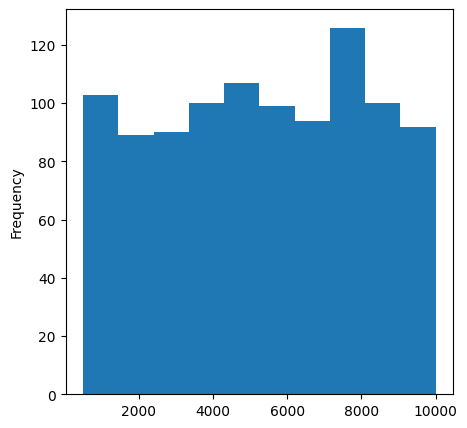

In [56]:
# - What am I doing? -
# Look at distribution of data using histogram. Play with bin size to see different views.

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)


# # Use this option for overall sales statistics
# grouped_Sales = Sales[['Product Location', 'MRR', 'NRR']]
# grouped_Sales = grouped_Sales.groupby('Product Location').sum()

# Plot Histogram
Sales['MRR'].plot(kind='hist', bins=10)

# # Use this option for overall Revenue statistics
# grouped_Revenue = Revenue.drop(columns=['Product Location', 'MRR'])
# grouped_Revenue = grouped_Revenue.groupby('Product Location').sum()

# Plot Histogram
Revenue['MRR'].plot(kind='hist', bins=10)


# # Use this option for overall Cost statistics
# grouped_Costs = Costs.drop(columns=['Product Location', 'Operational Cost', 'Marketing Cost', 'Infrastructure Cost'])
# grouped_Costs = grouped_Costs.groupby('Product Location').sum()

# Plot Histogram
Costs['Operational Cost'].plot(kind='hist', bins=10)


<Axes: ylabel='Density'>

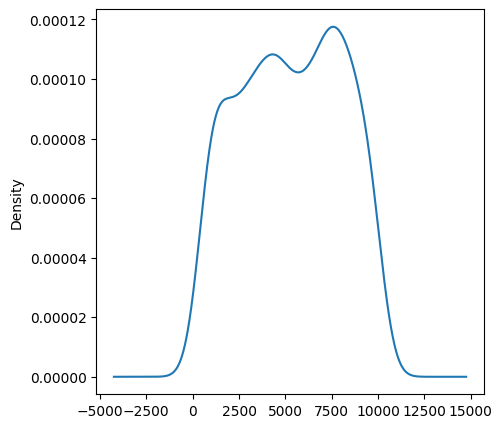

In [61]:
# - What am I doing? -
# Get density of data on ALL features

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Plot on kernel density

# # Use this option for overall sales statistics
# grouped_Sales = Sales[['Product Location', 'MRR', 'NRR']]
# grouped_Sales = grouped_Sales.groupby('Product Location').sum()

Sales['MRR'].plot(kind='kde')

# # Use this option for overall Revenue statistics
# grouped_Revenue = Revenue.drop(columns=['Product Location', 'MRR'])
# grouped_Revenue = grouped_Revenue.groupby('Product Location').sum()

Revenue['MRR'].plot(kind='kde')


# # Use this option for overall Cost statistics
# grouped_Costs = Costs.drop(columns=['Product Location', 'Operational Cost', 'Marketing Cost', 'Infrastructure Cost'])
# grouped_Costs = grouped_Costs.groupby('Product Location').sum()

Costs['MRR'].plot(kind='kde')


<Axes: xlabel='Operational Cost', ylabel='Marketing Cost'>

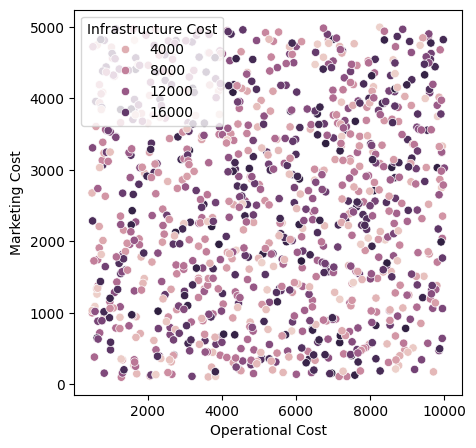

In [64]:
# - What am I doing? -
# Use seaborn to create scatter plot with color.

# sns.scatterplot(data=Sales, x="MRR", y="NRR")

sns.scatterplot(data=Costs, x="Operational Cost", y="Marketing Cost", hue="Infrastructure Cost")

In [67]:
# - What am I doing? -
# Look at value distributions

# Sales['Product Location'].value_counts()#.head(10).plot()

# Revenue['Product Location'].value_counts()#.head(10).plot()

Costs['Product Location'].value_counts()#.head(10).plot()

Product Location
Port Jeffrey        46
Smithbury           45
North Justin        45
Amandashire         44
Christopherport     41
North Victortown    39
Walkermouth         39
Lake Kyle           38
Port Ricardostad    36
Howardbury          36
New Stevenfort      35
West Jaime          35
Greenetown          34
Jessicamouth        33
Loriton             33
Lake Dustin         33
Shannontown         33
Kristinebury        32
Cookchester         32
Everettmouth        30
Dixonville          30
Markfurt            30
West Karlaport      29
West Leah           28
Port Kimberly       26
Port Williamside    26
Port Darius         25
South William       24
Davisburgh          23
Hickmanchester      20
Name: count, dtype: int64

<Axes: xlabel='Operational Cost'>

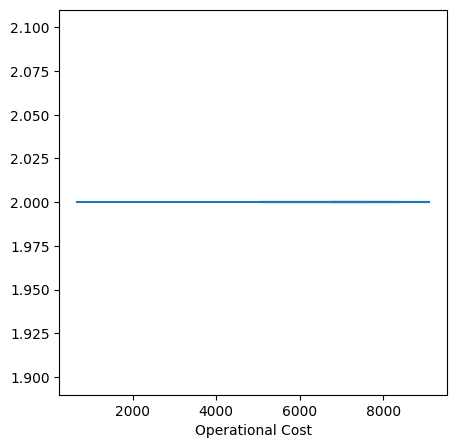

In [71]:
# - What am I doing? -
# Look at value distributions

# Sales['NRR'].value_counts().head(10).plot()

# Revenue['MRR'].value_counts().head(10).plot()

Costs['Operational Cost'].value_counts().head(10).plot()

## Sort values by column

In [72]:
# - What am I doing? -
# Sort columns by specified value
Sales.sort_values(by='MRR', ascending=False).head(10)

# Revenue.sort_values(by='NRR', ascending=False).head(10)

# Costs.sort_values(by='Operational Cost', ascending=False).head(10)

,Sales ID,Sales Rep ID,Sales Rep Name,Customer ID,Customer Name,Date ordered,MRR,NRR,Product Location ID,Product Location,Product ID,Product,Sales Status,Company Name
83,SALE0084,REP031,Amanda Green,CUST0045,Rachel Bennett,2021-07-31,4991,3057,LOC013,Greenetown,PROD002,Wireless Access Point,Cancelled,Butler PLC
486,SALE0487,REP020,Wayne Smith,CUST0117,Christina Martinez,2024-07-14,4984,1304,LOC025,Port Williamside,PROD004,Cable Modem,Pending,Welch PLC
552,SALE0553,REP008,Bobby Bell,CUST0173,Stephen Miller,2022-04-12,4976,3843,LOC024,Shannontown,PROD009,Ethernet Hub,Cancelled,"Young, Clayton and Gamble"
506,SALE0507,REP011,Shannon Buck,CUST0189,Whitney Fuller,2023-07-13,4974,3580,LOC029,Port Kimberly,PROD005,Cable Modem,Pending,Sparks-Austin
171,SALE0172,REP030,Linda Henderson,CUST0131,Gina Harrell,2022-09-01,4969,3943,LOC022,Loriton,PROD012,Satellite Connection,Cancelled,Schmidt Inc
8,SALE0009,REP005,Julian Pierce,CUST0160,Chelsea Mejia,2023-06-25,4963,2127,LOC030,Greenetown,PROD004,VoIP Subscription,Pending,Walls Ltd
681,SALE0682,REP038,Christine Browning,CUST0167,Megan Lee,2023-12-05,4962,478,LOC004,Greenetown,PROD002,Copper Wiring,Pending,"Rivera, Cooper and Atkinson"
351,SALE0352,REP012,Lisa Webb,CUST0038,Christine Hardin,2023-09-12,4952,869,LOC006,Port Jeffrey,PROD008,Cable Modem,Cancelled,Alvarado-Evans
253,SALE0254,REP037,Joan Aguilar,CUST0170,Sandy Smith,2023-12-04,4946,149,LOC001,South William,PROD001,Wireless Access Point,Pending,"Kline, Lopez and Brown"
498,SALE0499,REP038,Shannon Bradley,CUST0200,Brent Walker,2023-08-11,4941,362,LOC007,Everettmouth,PROD002,WiFi Router,Pending,Miller Inc


## Correlation with heat maps

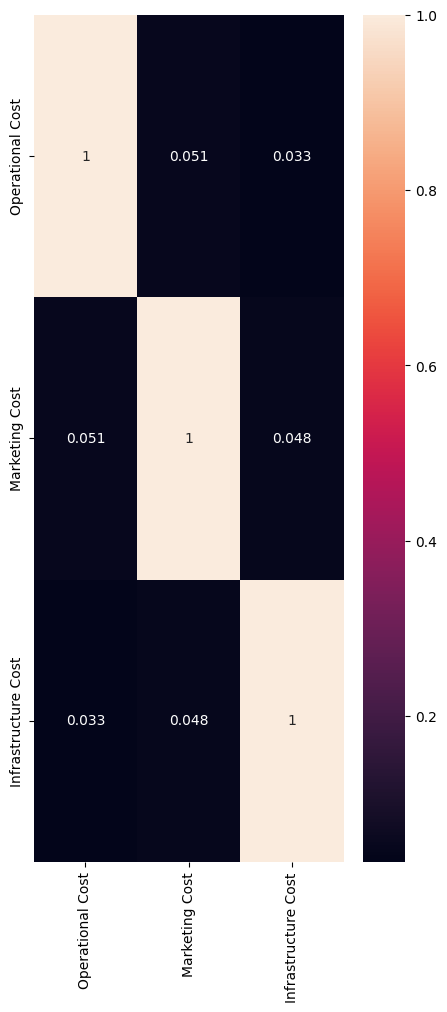

In [81]:
    # - What am I doing? -
    # Look at correlations for Sales

# # Remove text columns for correlation statistics.
# Correlation_Sales = Sales[['MRR', 'NRR']]

# # Looking at correlations between numeric values.
# Correlation_Sales.corr()

# # Visualize correlations for sales.
# # Good step to understand what your focus should be on during data analysis.
# sns.heatmap(Correlation_Sales.corr(), annot=True)

# plt.rcParams['figure.figsize'] = (5, 11)

# plt.show()


    # Look at correlations for Costs #

# Remove text columns for correlation statistics.
Correlation_Costs = Costs[['Operational Cost', 'Marketing Cost', 'Infrastructure Cost']]

# Looking at correlations between numeric values.
Correlation_Costs.corr()

# Visualize correlations for costs.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_Costs.corr(), annot=True)

plt.rcParams['figure.figsize'] = (5, 11)

plt.show()

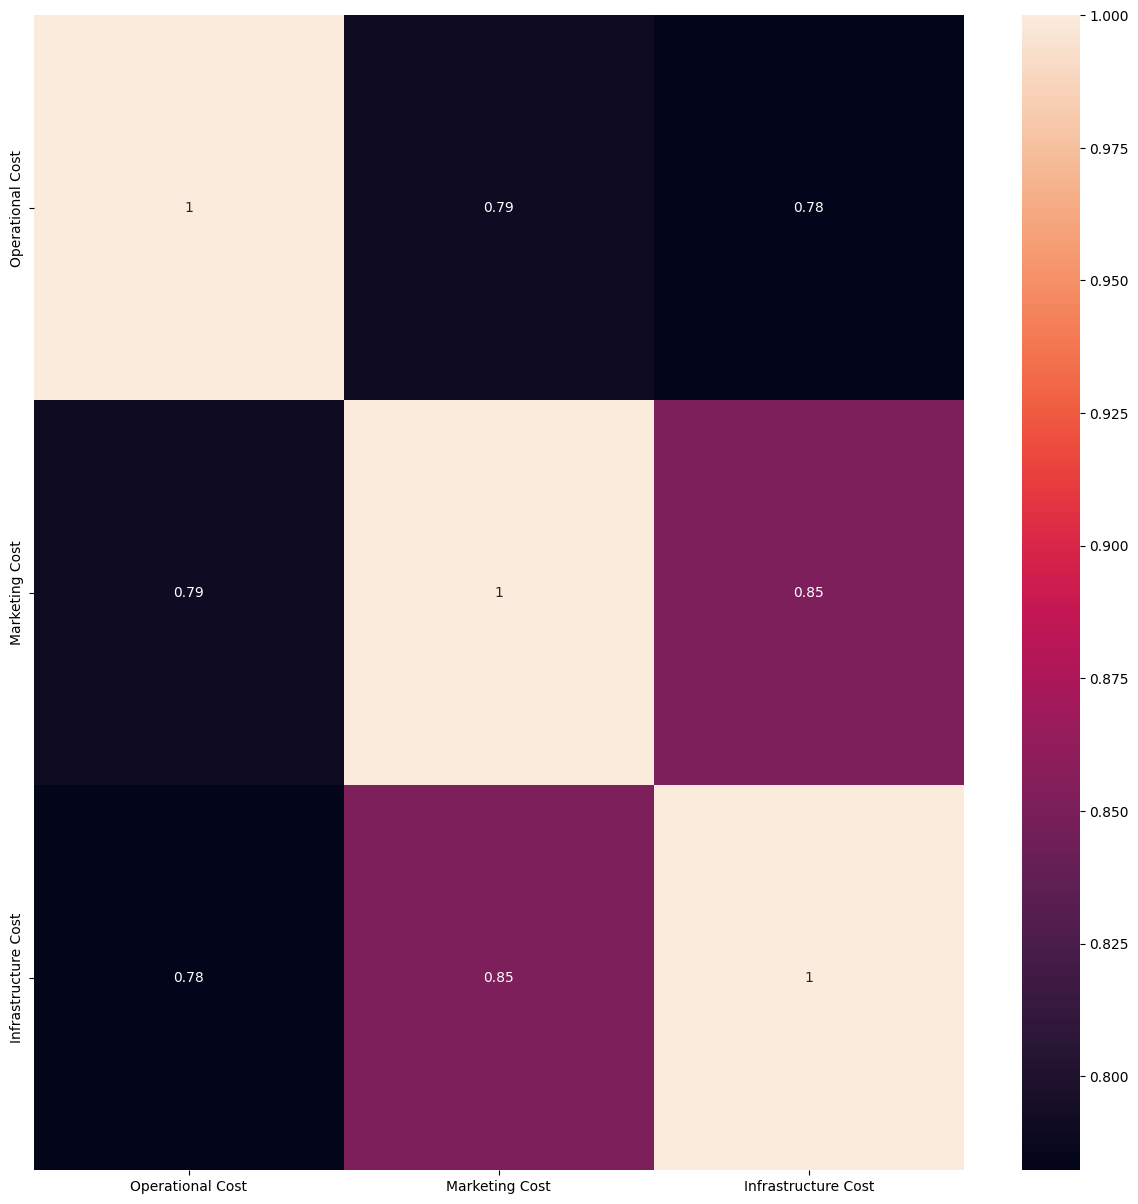

In [83]:
# - What am I doing? -
# Projecting correlations for quarterback's overall season in a heatmap

# # Remove text columns for correlation statistics.
# Correlation_Sales = Sales[['Product Location', 'MRR', 'NRR']]

# # Visualize correlations for sales.
# # Good step to understand what your focus should be on during data analysis.
# sns.heatmap(Correlation_Sales.groupby('Product Location').sum().corr(), annot=True)

# plt.rcParams['figure.figsize'] = (15, 15)

# plt.show()


####

# Remove text columns for correlation statistics.
Correlation_Costs = Costs[['Product Location', 'Operational Cost', 'Marketing Cost', 'Infrastructure Cost']]

# Visualize correlations for costs.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_Costs.groupby('Product Location').sum().corr(), annot=True)

plt.rcParams['figure.figsize'] = (15, 15)

plt.show()

## Group by

In [85]:
# - What am I doing? -
# Use Groupby function for Sales to summarize data and explore.

# Remove text columns for group by statistics.
Groupby_Sales = Sales[['Product Location', 'MRR', 'NRR']]

# Group columns to look at Sales dataset closer.
Groupby_Sales.groupby('Product Location').sum().sort_values(by='MRR', ascending=False).head(50)


# # Use Groupby function for Revenue to summarize data and explore.

# # Remove text columns for group by statistics.
# Groupby_Revenue = Revenue[['Product Location', 'MRR']]

# # Group columns to look at Revenue dataset closer.
# Groupby_Revenue.groupby('Product Location').sum().sort_values(by='MRR', ascending=False).head(50)


# # Use Groupby function for Costs to summarize data and explore.

# # Remove text columns for group by statistics.
# Groupby_Costs = Costs[['Product Location', 'Operational Cost', 'Marketing Cost', 'Infrastructure Cost']]

# # Group columns to look at Costs dataset closer.
# Groupby_Costs.groupby('Product Location').sum().sort_values(by='Operational Cost', ascending=False).head(50)

,MRR,NRR
Product Location,,
Loriton,144956,92441
South William,107815,61095
Davisburgh,104369,70740
Amandashire,102920,62125
Everettmouth,99080,72506
Port Williamside,98105,66539
Walkermouth,95660,70282
Greenetown,95470,86758
Kristinebury,92106,74922


## String Contains

In [235]:
# - What am I doing? -
# Search for specific strings in data for Sales, Revenue, and Costs.

# Look at rows that contain specified string in column.
Sales[Sales['Customer Name'].str.contains('Allen')]

Revenue[Revenue['Customer Name'].str.contains('Allen')]

Costs[Costs['Customer Name'].str.contains('Allen')]

,Date,Opponent,CMP,ATT,PASS_YDS,CMP%,PASS_AVG,PASS_TD,INT,PASS_LNG,SACK,RTG,QBR,RUSH_CAR,RUSH_YDS,RUSH_AVG,RUSH_TD,LNG_RUSH,playerName,Game Result,Winner Score,Loser Score,OT?,Home/Away,fantasy_points
44,2024-09-23,JAX,23,30,263,0.767,8.8,4,0,28,0,142.1,983.0,6,44,7.3,0,13,Josh Allen,W,47,10,None,Home,30.92
45,2024-09-08,ARI,18,23,232,0.783,10.1,2,0,28,2,137.7,863.0,9,39,4.3,2,9,Josh Allen,W,34,28,None,Home,33.18
46,2024-09-12,MIA,13,19,139,0.684,7.3,1,0,33,0,107.1,813.0,2,2,1.0,0,3,Josh Allen,W,31,10,None,Away,9.76


## Pair Plots

In [238]:
QuarterbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CMP', 'ATT', 'PASS_YDS', 'CMP%', 'PASS_AVG',
       'PASS_TD', 'INT', 'PASS_LNG', 'SACK', 'RTG', 'QBR', 'RUSH_CAR',
       'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD', 'LNG_RUSH', 'playerName',
       'Game Result', 'Winner Score', 'Loser Score', 'OT?', 'Home/Away',
       'fantasy_points'],
      dtype='object')

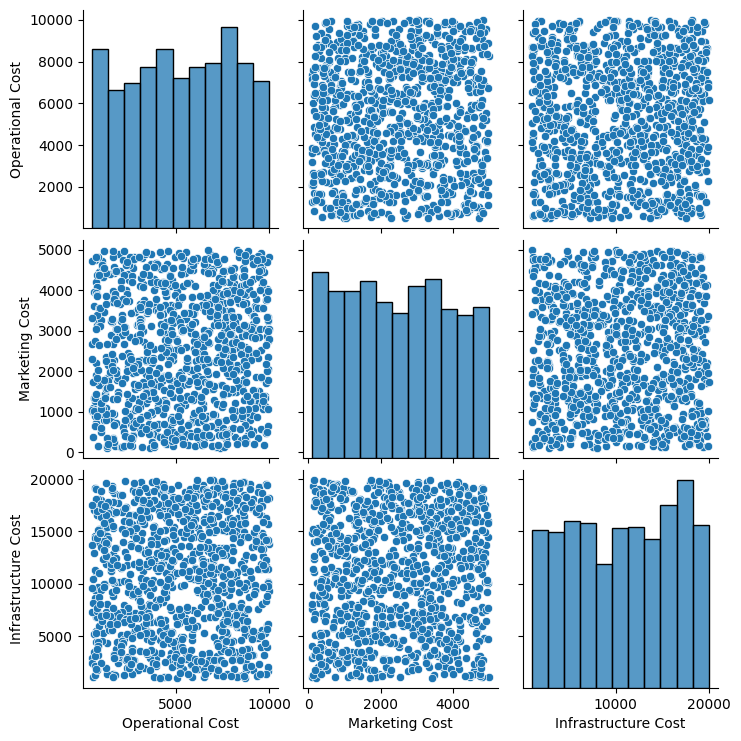

In [88]:
    # - What am I doing? -
    # What if we want to compare more than two features?
    
    # Sales
# # Pick columns to use for plot
# MultiScatter_Sales = Sales[['MRR', 'NRR']]

# # Use pairplot to compare more features
# sns.pairplot(MultiScatter_QuarterbackWeektoWeek2023, hue="RUSH_TD")

    # Costs
# Pick columns to use for plot
MultiScatter_Costs = Costs[['Operational Cost', 'Marketing Cost', 'Infrastructure Cost']]

# Use pairplot to compare more features
sns.pairplot(MultiScatter_Costs)

## Box Plots

<Axes: >

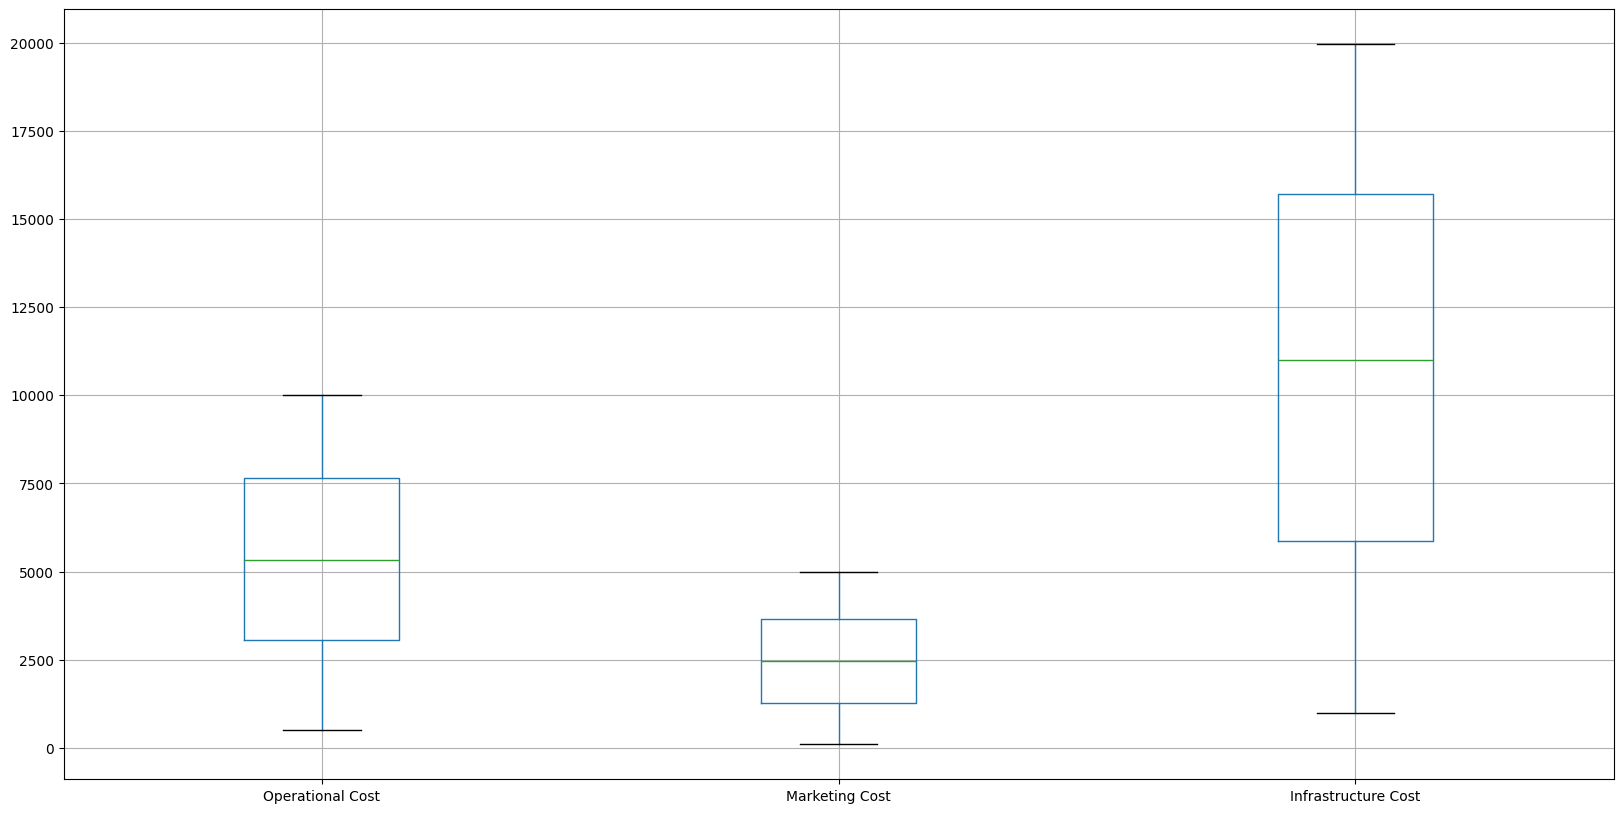

In [89]:
    # - What am I doing? -
    # Look for high level info about runningbacks with a box plot

    # Sales
# # Remove text columns for group by statistics.
# Groupby_Sales = Sales[['MRR', 'NRR']]

# # IF need to see boxplot by season instead of by game
# # Groupby_Sales = Groupby_Sales.groupby('playerName').sum()

# # Look at boxplots to find outliers.
# Groupby_Sales.boxplot(figsize=(20,10))

#     # Revenue
# # Remove text columns for group by statistics.
# Groupby_Revenue = Revenue[['NRR']]

# # IF need to see boxplot by season instead of by game
# # Groupby_Revenue = Groupby_Revenue.groupby('playerName').sum()

# # Look at boxplots to find outliers.
# Groupby_Revenue.boxplot(figsize=(20,10))

    # Costs
# Remove text columns for group by statistics.
Groupby_Costs = Costs[['Operational Cost', 'Marketing Cost', 'Infrastructure Cost']]

# IF need to see boxplot by season instead of by game
# Groupby_Costs = Groupby_Costs.groupby('playerName').sum()

# Look at boxplots to find outliers.
Groupby_Costs.boxplot(figsize=(20,10))